In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold

In [2]:
#Reading the dataset
df = pd.read_csv('F://Uni/991/Machine_Learning/ML_991_Final/Dataset/4/SeoulBikeData.csv')
df.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


# Preparing the Data

In [3]:
df = df.replace({'Seasons': {'Spring': 0, 'Summer': 1, 'Autumn': 2, 'Winter': 3 }
                , 'Holiday': {'No Holiday': 0, 'Holiday': 1}
                , 'Functioning Day': {'Yes': 1, 'No': 0}})
df = df.drop(columns=['Date'])
df.head()

,Rented Bike Count,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,0,1


In [4]:
xdf = df.drop(columns=['Rented Bike Count'])
ydf = df['Rented Bike Count']

In [5]:
#Using K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=0)

# Finding Best K Features

In [6]:
#Computing Absolute Value of Correlation between Features
betweencorr=abs(xdf.corr())
#Computing Absolute Value of Correlation between Features and the Output
outputcorr = abs(xdf.corrwith(ydf))

In [7]:
betweencorr

,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
Hour,1.000000e+00,0.124114,0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,0.021516,7.869398e-20,1.691160e-20,0.005439
Temperature,1.241145e-01,1.000000,0.159371,0.036252,0.034794,0.912798,0.353505,0.050282,0.218405,5.501761e-01,5.593084e-02,0.050170
Humidity(%),2.416438e-01,0.159371,1.000000,0.336683,0.543090,0.536894,0.461919,0.236397,0.108183,1.790537e-01,5.027765e-02,0.020800
Wind speed (m/s),2.851967e-01,0.036252,0.336683,1.000000,0.171507,0.176486,0.332274,0.019674,0.003554,2.090506e-03,2.301677e-02,0.005037
Visibility (10m),9.875348e-02,0.034794,0.543090,0.171507,1.000000,0.176630,0.149738,0.167629,0.121695,1.250331e-01,3.177281e-02,0.026000
Dew point temperature,3.054372e-03,0.912798,0.536894,0.176486,0.176630,1.000000,0.094381,0.125597,0.150887,5.340374e-01,6.675910e-02,0.052837
Solar Radiation (MJ/m2),1.451309e-01,0.353505,0.461919,0.332274,0.149738,0.094381,1.000000,0.074290,0.072301,1.809703e-01,5.077255e-03,0.007665
Rainfall(mm),8.714642e-03,0.050282,0.236397,0.019674,0.167629,0.125597,0.074290,1.000000,0.008500,5.732517e-02,1.426911e-02,0.002055
Snowfall (cm),2.151645e-02,0.218405,0.108183,0.003554,0.121695,0.150887,0.072301,0.008500,1.000000,2.035642e-01,1.259072e-02,0.032089
Seasons,7.869398e-20,0.550176,0.179054,0.002091,0.125033,0.534037,0.180970,0.057325,0.203564,1.000000e+00,1.039272e-01,0.030785


In [8]:
outputcorr

Hour                       0.410257
Temperature                0.538558
Humidity(%)                0.199780
Wind speed (m/s)           0.121108
Visibility (10m)           0.199280
Dew point temperature      0.379788
Solar Radiation (MJ/m2)    0.261837
Rainfall(mm)               0.123074
Snowfall (cm)              0.141804
Seasons                    0.297095
Holiday                    0.072338
Functioning Day            0.203943
dtype: float64

In [9]:
# Setting the threshold
threshold=0.9

In [10]:
# Computing score for dataset with all of the features
scorelist = list()
for train_index, test_index in kf.split(xdf):
    xtrain, xtest = xdf.iloc[train_index], xdf.iloc[test_index]
    ytrain, ytest = ydf.iloc[train_index], ydf.iloc[test_index]
    scorelist.append(LinearRegression(normalize=True).fit(xtrain, ytrain).score(xtest,ytest))
allscore = sum(scorelist)/len(scorelist)
print('Score without Removing any Features: ', allscore)

Score without Removing any Features:  0.5244805851401724


In [11]:
#Setting up a mask to remove 1 from the diagonal of the correlation matrix
mask = np.eye(betweencorr.shape[0])*(-1)+1
maxdf=betweencorr*mask
#Removing features will stop if linear regressor's score doesn't get any better
t = True
# i is for figuring out how many features got removed
i=0
while t==True:
    #print(t)
    if maxdf.max().max()>=threshold:
        maxwhere=np.where(maxdf.max()==maxdf.max().max())
        n = np.argmin(outputcorr[maxwhere[0]])
        print('Featurs with correlation more than Threshold:\n', maxdf.columns[maxwhere[0][0]], ', ', maxdf.columns[maxwhere[0][1]])
        d = maxdf.columns[maxwhere[0][n]]
        print('Removing ', d)
        #removing the chosen feature
        maxdf.drop(columns=[d],inplace=True)
        maxdf.drop(index=[d],inplace=True, axis=1)
        outputcorr.drop(index=[d],inplace=True, axis=1)
        xdf.drop(columns=[d],inplace=True)
        scorelist = list()
        for train_index, test_index in kf.split(xdf):
            xtrain, xtest = xdf.iloc[train_index], xdf.iloc[test_index]
            ytrain, ytest = ydf.iloc[train_index], ydf.iloc[test_index]
            scorelist.append(LinearRegression(normalize=True).fit(xtrain, ytrain).score(xtest,ytest))
        score = sum(scorelist)/len(scorelist)
        print('Score After Feature Removal: ', score)
        #Checking if the score got better
        if score<allscore:
            t=False
        else:
            allscore=score
            i+=1
    else:
        t = False
print('Number of Features Removed: ', i)

Featurs with correlation more than Threshold:
 Temperature ,  Dew point temperature
Removing  Dew point temperature
Score After Feature Removal:  0.5242881105793147
Number of Features Removed:  0


# Lasso Regression

In [12]:
from sklearn.linear_model import Lasso

In [13]:
#Using the full dataset for this part
xdf = df.drop(columns=['Rented Bike Count'])

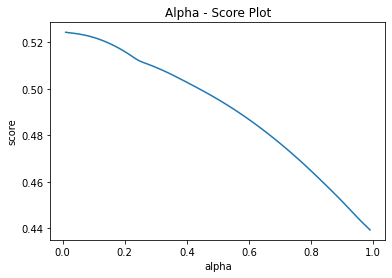

All the Scores:
 [0.5244140924989226, 0.5242170073176554, 0.52406503794692, 0.5238921452883256, 0.5236909618813026, 0.5234646385443404, 0.5232057436112172, 0.5229065146349109, 0.5225657431919994, 0.5221834569341173, 0.5217605337884577, 0.5212967162571519, 0.5207908623478825, 0.5202443336616092, 0.5196566950226831, 0.5190267318176048, 0.5183571150127315, 0.5176456954677546, 0.5168929523169136, 0.5160992361826215, 0.5152646403760596, 0.5143916086956433, 0.5134768441657758, 0.5126271915277004, 0.5119357042461607, 0.5113912967075452, 0.5109035672255612, 0.5103958649133584, 0.5098681978562253, 0.5093205662359754, 0.5087529697857152, 0.5081654085054448, 0.5075578823951644, 0.5069303914548738, 0.5062829356845733, 0.5056155150842624, 0.5049293567758093, 0.5042516287123702, 0.5035644157712144, 0.5028751441891615, 0.5021677939247116, 0.5014650785612036, 0.5007593468197846, 0.500036489109769, 0.499305395961491, 0.4985749204476949, 0.49783197040193106, 0.4970737146280424, 0.49630783972927894, 0.49

In [14]:
#Defining several values for alpha
alpha = np.arange(0.01,1,0.01)
allscorelist = list()
#Computing score for each alpha
for a in alpha:
    scorelist = list()
    #K-Fold cross validation
    for train_index, test_index in kf.split(xdf):
        xtrain, xtest = xdf.iloc[train_index], xdf.iloc[test_index]
        ytrain, ytest = ydf.iloc[train_index], ydf.iloc[test_index]
        lassomodel = Lasso(alpha=a, normalize=True).fit(xtrain,ytrain)
        scorelist.append(lassomodel.score(xtest,ytest))
    allscorelist.append(sum(scorelist)/len(scorelist))
plt.plot(alpha,allscorelist)
plt.title('Alpha - Score Plot')
plt.xlabel('alpha')
plt.ylabel('score')
plt.show()
print('All the Scores:\n', allscorelist)
#print(allscorelist.index(max(allscorelist)))
bestalpha = alpha[allscorelist.index(max(allscorelist))]
print('Best Alpha: ', bestalpha)

In [15]:
#Finding Coefficients for the model with best alpha
#K-Fold cross validation
scorelist = list()
for train_index, test_index in kf.split(xdf):
    xtrain, xtest = xdf.iloc[train_index], xdf.iloc[test_index]
    ytrain, ytest = ydf.iloc[train_index], ydf.iloc[test_index]
    lassomodel = Lasso(alpha=bestalpha, normalize=True).fit(xtrain,ytrain)
    score = lassomodel.score(xtest, ytest)
    print('Lasso Model Coefficients: \n', lassomodel.coef_)
    print('Lasso Score', score)
    scorelist.append(score)
allscore = sum(scorelist)/len(scorelist)
print('Average Score: ', allscore)

Lasso Model Coefficients: 
 [ 2.72886523e+01  2.45730311e+01 -8.46643623e+00  5.92915221e+00
  4.54599764e-02  6.08237737e+00 -7.45128895e+01 -5.74089383e+01
  1.26231448e+01 -2.83917404e+01 -1.27940428e+02  7.97820538e+02]
Lasso Score 0.5143528693010182
Lasso Model Coefficients: 
 [ 2.73534633e+01  2.67348617e+01 -8.53560469e+00  2.30236843e+00
  3.99017035e-02  4.14328216e+00 -7.75499385e+01 -5.65530881e+01
  2.04403485e+01 -2.74082101e+01 -1.61687048e+02  7.92989331e+02]
Lasso Score 0.5272464875156628
Lasso Model Coefficients: 
 [ 2.75438849e+01  2.68209808e+01 -8.01405220e+00  3.82679252e+00
  3.86450549e-02  3.84750695e+00 -7.34555816e+01 -6.01565386e+01
  1.63166669e+01 -2.47356145e+01 -1.41647653e+02  7.97518113e+02]
Lasso Score 0.5321045843840237
Lasso Model Coefficients: 
 [ 2.78269438e+01  2.67192661e+01 -7.70456806e+00  6.38887214e+00
  3.93095495e-02  3.64848917e+00 -7.27217171e+01 -6.13040534e+01
  1.57567761e+01 -2.59316527e+01 -1.28233661e+02  7.95808615e+02]
Lasso Score